In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize as minimize

In [29]:
# data = np.loadtxt("data/AiCU/Greenhouse_climate.csv")
# /home/roelink/Documents/Project2/data/AiCU/Greenhouse_climate.csv
GHClim = pd.read_csv("data/Croperators/Greenhouse_climate.csv") 
Crop = pd.read_csv("data/Croperators/CropManagement.csv") 
irri = pd.read_csv("data/Croperators/Irrigation.csv") 
prod = pd.read_csv("data/Croperators/Production.csv") 
vip = pd.read_csv("data/Croperators/vip.csv") 

In [30]:
teams = ["AiCU", "Croperators", "DeepGreens", "iGrow", "Reference(Growers)","Sonoma"]
data = {}
for team in teams:
    GHClim = pd.read_csv(f"data/{team}/Greenhouse_climate.csv") 
    Crop = pd.read_csv(f"data/{team}/CropManagement.csv") 
    irri = pd.read_csv(f"data/{team}/Irrigation.csv") 
    prod = pd.read_csv(f"data/{team}/Production.csv") 
    vip = pd.read_csv(f"data/{team}/vip.csv") 
    GHClim = GHClim.drop(['VentLee', 'Ventwind', 'AssimLight', 'BlackScr', 'EnScr'], axis=1)
    
    GHClim.fillna(method='ffill', inplace=True)
    Crop.fillna(method='ffill', inplace=True)
    irri.fillna(method='ffill', inplace=True)
    prod.fillna(method='ffill', inplace=True)
    vip.fillna(method='ffill', inplace=True)
    
    # If last column is NaN
    GHClim.fillna(method='ffill', inplace=True)
    Crop.fillna(method='ffill', inplace=True)
    irri.fillna(method='ffill', inplace=True)
    prod.fillna(method='ffill', inplace=True)
    vip.fillna(method='ffill', inplace=True)
    data[team] = {'GHClim':GHClim, 'Crop':Crop, 'irri':irri, 'prod':prod, 'vip':vip}

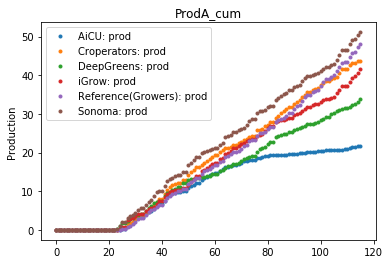

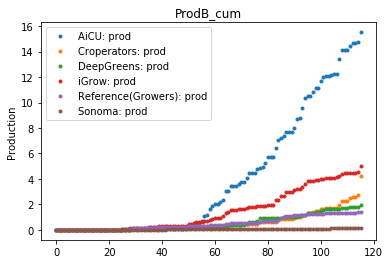

In [31]:
for category in ['ProdA_cum', 'ProdB_cum']:
    for team in teams:
        prod_df = data[team]['prod'][category]
        plt.plot(prod_df, '.', label=f'{team}: prod')
        plt.title(category)
        plt.ylabel("Production")
        plt.legend()
        prod_df[prod_df.index[-1]]
    plt.show()

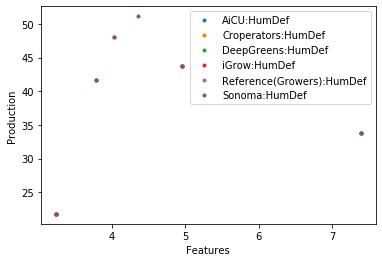

In [32]:
tair, hum_def, prod = [], [], []
# for category in ['ProdA_cum', 'ProdB_cum']:
category = 'ProdA_cum'
for team in teams:
    prod_df = data[team]['prod'][category]
    tair.append(data[team]['GHClim']['Tair'].mean())
    hum_def.append(data[team]['GHClim']['HumDef'].mean())
    prod.append(prod_df[prod_df.index[-1]])
        
    plt.plot(hum_def, prod, '.', label=f'{team}:HumDef')   
#     plt.plot(tair, prod, '.', label=f'{team}Tair')
plt.ylabel("Production")
plt.xlabel("Features")
plt.legend()
plt.show()

In [33]:
# hum_def.insert(0,0)
# tair.insert(0,0)
# prod.insert(0,0)

In [34]:
def polynomial3th(params, *args):
    a,b,c,d = params
    sums = 0
    for x,y in zip(*args):
        sums += (a*x**3+b*x**2+c*x + d- y)**2
    return sums

def polynomial4th(params, *args):
    a,b,c,d,e = params
    sums = 0
    for x,y in zip(*args):
        sums += (a*x**4+b*x**3+c*x**2+d*x+e - y)**2
    return sums

def minimize_poly(func, params, args):
    res = minimize(func, params, args=args, method='BFGS')
    prev = 0
    while int(res.fun) != prev:
        prev = int(res.fun)
        res = minimize(func, res.x, method='BFGS')
    return res

def y_poly3th(x, params):
    a,b,c,d = params
    y = a*x**3+b*x**2+c*x + d
    return y

def y_poly4th(x, params):
    a,b,c,d,e = params
    y = a*x**4+b*x**3+c*x**2+d*x+e
    return y

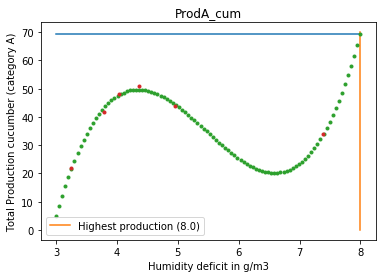

In [36]:
x = np.linspace(3,8,100)
res = minimize_poly(polynomial3th,(1,1,1,1), (hum_def, prod))
y_poly3th(x, res.x)
y = y_poly3th(x, res.x)
plt.plot(x, [max(y) for i in range(100)])
plt.plot([x[np.argmax(y)]]*2, [0,70], label=f'Highest production ({x[np.argmax(y)]})')
plt.plot(x, y, '.')
plt.plot(hum_def,prod, '.')
plt.xlabel("Humidity deficit in g/m3")
plt.ylabel("Total Production cucumber (category A)")
plt.legend()
plt.title(category)
plt.show()

In [ ]:
x = np.linspace(0,25,100)
res = minimize_poly(polynomial4th, (1,1,1,1,1), (tair, prod))
y = y_poly4th(x, res.x)
plt.plot(x, [max(y) for i in range(100)])
plt.plot([x[np.argmax(y)]]*2, [0,55], label=f'Highest production ({x[np.argmax(y)]})')
plt.plot(x, y, '.')
plt.plot(tair,prod, '.')
# plt.legend()
plt.xlabel("Air temperature greenhouse in Celcius")
plt.ylabel("Total Production cucumber (category A)")
plt.title(category)
plt.show()